In [ ]:
#import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# pip install seaborn

In [3]:
#read data

In [4]:
data = pd.read_csv("UberData.csv")

In [11]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [ ]:
#remove * from column attributes

In [24]:
columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE']

In [30]:
data.columns = columns

In [31]:
data.shape

(1154, 7)

In [32]:
data.tail(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [33]:
# last row is not needed

In [34]:
data = data[:-1]

In [35]:
data.shape

(1153, 7)

## Dealing with missing values

In [36]:
data.isnull()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1148,False,False,False,False,False,False,False
1149,False,False,False,False,False,False,False
1150,False,False,False,False,False,False,False
1151,False,False,False,False,False,False,False


In [37]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [38]:
# replacing NaN with "others" since purpose contain strings

In [39]:
data = data.fillna("Others")

In [40]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

### Dealing with data types

In [41]:
data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [42]:
#object == string. Converting start_date and end_date to date time

In [43]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

In [44]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Others
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Feature Engineering

In [46]:
hour = []
day = []
month = []
dayofweek = []
dayname = []
for i in data['START_DATE']:
    hour.append(i.hour)
    day.append(i.day)
    month.append(i.month)
    dayofweek.append(i.dayofweek)
    dayname.append(i.day_name)
data['HOUR'] = hour
data['DAY'] = day
data['MONTH'] = month
data['DAYOFWEEK'] = dayofweek
data['DAYNAME'] = dayname

In [47]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,<built-in method day_name of Timestamp object ...
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Others,1,2,1,5,<built-in method day_name of Timestamp object ...
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,<built-in method day_name of Timestamp object ...
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,<built-in method day_name of Timestamp object ...
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,<built-in method day_name of Timestamp object ...


## Observations

###  1. How long people travel in uber?

In [48]:
data['MILES']

0        5.1
1        5.0
2        4.8
3        4.7
4       63.7
        ... 
1148     4.6
1149     0.8
1150     0.7
1151     3.9
1152    16.2
Name: MILES, Length: 1153, dtype: float64

<AxesSubplot:xlabel='Distance (in miles)', ylabel='Frequency'>

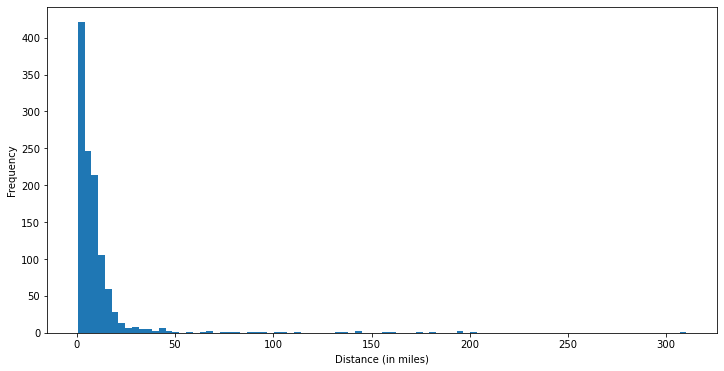

In [63]:
plt.figure(figsize=(12,6))
plt.xlabel("Distance (in miles)")
plt.ylabel("No of people")
data['MILES'].plot(kind='hist', bins=90)

<h4>Result :<br>
        1. Most people use Uber for short distance<br>
        2. Very few people use Uber for long distances</h4>

### 2.What hour do most people take Uber?

In [64]:
data['HOUR']

0       21
1        1
2       20
3       17
4       14
        ..
1148    16
1149    23
1150     1
1151    13
1152    15
Name: HOUR, Length: 1153, dtype: int64

In [68]:
data['HOUR'].value_counts()

15    98
17    95
18    94
13    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    50
8     35
22    30
23    26
0     19
7     13
1      5
6      4
5      4
3      3
2      2
Name: HOUR, dtype: int64

<AxesSubplot:>

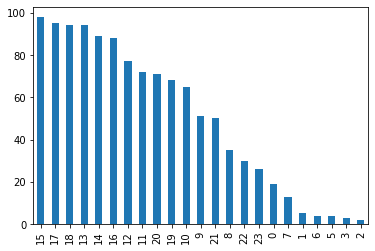

In [67]:
data['HOUR'].value_counts().plot(kind='bar')

C:\Users\Varada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOUR', ylabel='count'>

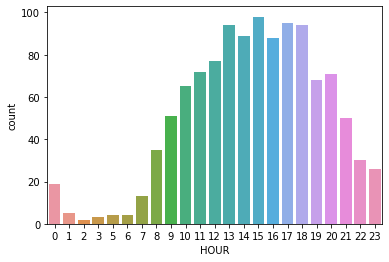

In [66]:
sns.countplot(data['HOUR'])

<h4>Result :<br>
        1. Most people take Uber at 15th hour<br>
        2. Very few people take Uber at 2</h4>

### What is the purpose of the trip?

In [69]:
data['PURPOSE']

0        Meal/Entertain
1                Others
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1148            Meeting
1149     Customer Visit
1150            Meeting
1151     Temporary Site
1152            Meeting
Name: PURPOSE, Length: 1153, dtype: object

In [70]:
data['PURPOSE'].value_counts()

Others             502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      48
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

<AxesSubplot:>

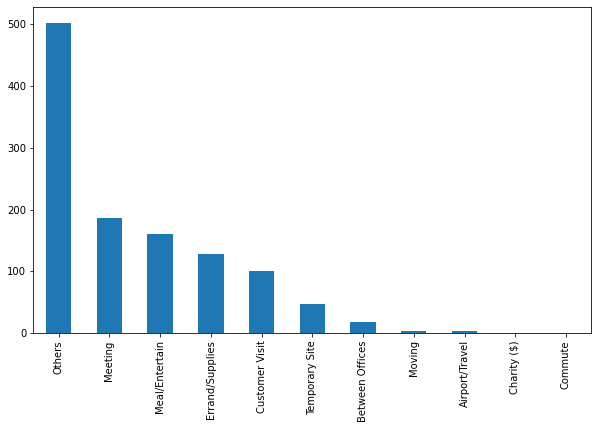

In [76]:
plt.figure(figsize=(10,6))
data['PURPOSE'].value_counts().plot(kind='bar')

<h4>Result :<br>
        1. Purpose of trip is mostly because of meeting

### 4. Which day has the highest number of trips?

In [77]:
data['DAY']

0        1
1        2
2        2
3        5
4        6
        ..
1148    30
1149    30
1150    31
1151    31
1152    31
Name: DAY, Length: 1153, dtype: int64

In [78]:
data['DAY'].value_counts()

19    67
29    51
27    51
26    45
22    45
21    45
12    44
1     43
16    42
20    38
18    38
8     37
13    37
11    37
28    36
10    35
25    35
23    34
7     34
17    33
6     33
14    33
5     33
4     33
3     33
30    32
2     30
24    29
9     29
15    28
31    13
Name: DAY, dtype: int64

<AxesSubplot:>

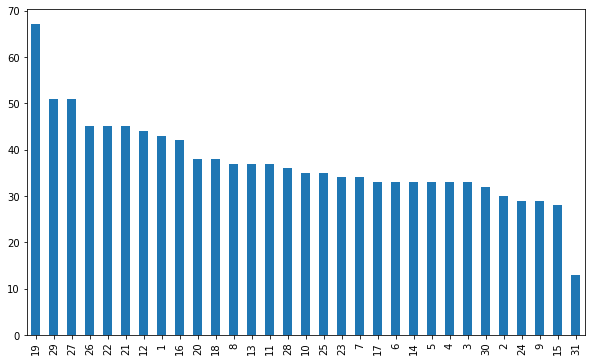

In [80]:
plt.figure(figsize=(10,6))
data['DAY'].value_counts().plot(kind='bar')

<h4>Result :<br>
        1. Day 19 has highest number of trips<br>
        2. Day 31 has lowest number of trips</h4>